In [21]:
!pip install keras

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [23]:
data=pd.read_csv("stock-market.txt")

In [24]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [25]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [26]:
data.duplicated().sum()

0

In [27]:
# Choose the feature to predict (e.g., 'Close' price)
target_column = 'Close'

In [28]:
# Extract the target column values
target_values = data[target_column].values.reshape(-1, 1)

In [29]:
# Normalize the target values
scaler = MinMaxScaler()
target_values_scaled = scaler.fit_transform(target_values)

In [30]:
# Define the number of past days to use for prediction
look_back = 10

In [31]:
# Create sequences and labels from the data
sequences = []
labels = []

In [32]:
for i in range(len(target_values_scaled) - look_back):
    sequences.append(target_values_scaled[i:i+look_back])
    labels.append(target_values_scaled[i+look_back])

sequences = np.array(sequences)
labels = np.array(labels)

In [33]:
# Split the data into training and testing sets
train_size = int(0.8 * len(sequences))
train_sequences = sequences[:train_size]
train_labels = labels[:train_size]
test_sequences = sequences[train_size:]
test_labels = labels[train_size:]

In [35]:
# Build the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(look_back, 1)),
    Dense(units=1)
])

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Train the model
model.fit(train_sequences, train_labels, epochs=50, batch_size=32)

Epoch 1/50
51/51 [==============================] - 2s 7ms/step - loss: 0.0508
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 3/50
51/51 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 4/50
51/51 [==============================] - 0s 7ms/step - loss: 9.3943e-04
Epoch 5/50
51/51 [==============================] - 0s 7ms/step - loss: 8.7660e-04
Epoch 6/50
51/51 [==============================] - 0s 8ms/step - loss: 7.6779e-04
Epoch 7/50
51/51 [==============================] - 1s 10ms/step - loss: 7.0791e-04
Epoch 8/50
51/51 [==============================] - 1s 10ms/step - loss: 6.8577e-04
Epoch 9/50
51/51 [==============================] - 1s 10ms/step - loss: 6.6130e-04
Epoch 10/50
51/51 [==============================] - 1s 10ms/step - loss: 6.4489e-04
Epoch 11/50
51/51 [==============================] - 1s 10ms/step - loss: 6.7329e-04
Epoch 12/50
51/51 [==============================] - 0s 7ms/step - loss: 6.0992e-04
Epoch 13

In [38]:
# Make predictions
predicted_labels_scaled = model.predict(test_sequences)

13/13 [==============================] - 0s 3ms/step


In [39]:
# Inverse transform the scaled predictions to original scale
predicted_labels = scaler.inverse_transform(predicted_labels_scaled)

In [43]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 103.19529502952875


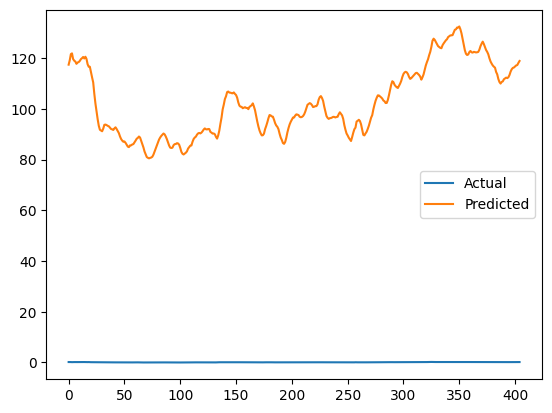

In [44]:
# Plot the actual vs. predicted values
plt.plot(test_labels, label='Actual')
plt.plot(predicted_labels, label='Predicted')
plt.legend()
plt.show()